In [7]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Generate time/#threads plots

In [9]:
def get_serial_data(size_of_matrix, jobid):
    directory_path = './outputs/timings'
    files = os.listdir(directory_path)
    csv_file = [file for file in files if "serial" in file and str(jobid) in file]
    if csv_file:
        csv_file_path = os.path.join(directory_path, csv_file[0])
        df = pd.read_csv(csv_file_path)
    
        print(df)
    else:
        print("No CSV file with the name 'serial-data' found.")

    return df[df["dim"] == size_of_matrix]

In [10]:
data1 = pd.read_csv("./outputs/timings/openmp-scal-740667.csv")
data2 = pd.read_csv("./outputs/timings/openmp-scal-740543.csv")
data3 = pd.read_csv("./outputs/timings/openmp-scal-740549.csv")

data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,dim,nthreads,time
0,2000,1,45.523924
1,2000,2,86.026052
2,2000,3,79.548514
3,2000,4,72.607147
4,2000,5,70.921277


In [11]:
df100 = data[data["dim"] == 100]
df500 = data[data["dim"] == 500]
df1000 = data[data["dim"] == 1000]
df1500 = data[data["dim"] == 1500]
df2000 = data[data["dim"] == 2000]



## Serial times

In [12]:
SERIAL_JOBID = 743099

serial100 = get_serial_data(size_of_matrix=100, jobid=SERIAL_JOBID)
serial500 = get_serial_data(size_of_matrix=500, jobid=SERIAL_JOBID)
serial1000 = get_serial_data(size_of_matrix=1000, jobid=SERIAL_JOBID)
serial1500 = get_serial_data(size_of_matrix=1500, jobid=SERIAL_JOBID)
serial2000 = get_serial_data(size_of_matrix=2000, jobid=SERIAL_JOBID)

    dim  nthreads  time
0  1000         1  5.81
    dim  nthreads  time
0  1000         1  5.81
    dim  nthreads  time
0  1000         1  5.81
    dim  nthreads  time
0  1000         1  5.81
    dim  nthreads  time
0  1000         1  5.81


In [13]:
#Add speedup column
def add_speedup_and_normalized_t_columns(data: pd.DataFrame, serial_time):
    data["speedup"] = serial_time / (data["time"])
    max_time = data["time"].max()
    data["max_normalized"] = data["time"].div(max_time)

add_speedup_and_normalized_t_columns(df100, serial100)
add_speedup_and_normalized_t_columns(df500, serial500)
add_speedup_and_normalized_t_columns(df1000, serial1000)
add_speedup_and_normalized_t_columns(df1500, serial1500)
add_speedup_and_normalized_t_columns(df2000, serial2000)

ValueError: Cannot set a DataFrame with multiple columns to the single column speedup

In [ ]:
df2000.head()

,dim,nthreads,time,speedup,max_normalized
0,2000,1,45.523924,1.000000,0.529188
1,2000,2,86.026052,0.529188,1.000000
2,2000,3,79.548514,0.572279,0.924703
3,2000,4,72.607147,0.626990,0.844013
4,2000,5,70.921277,0.641894,0.824416


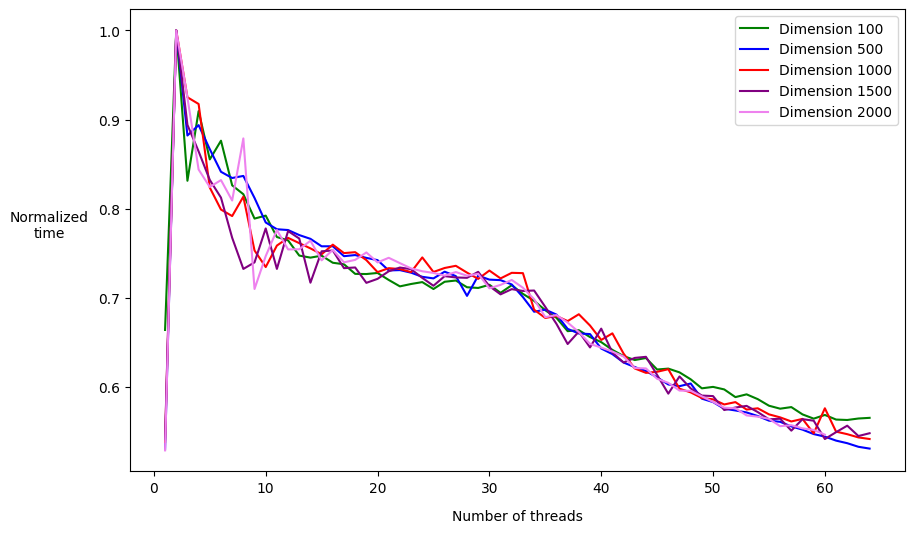

In [ ]:
dataframes = [
    (df100, "Dimension 100", "green"),
    (df500, "Dimension 500", "blue"),
    (df1000, "Dimension 1000", "red"),
    (df1500, "Dimension 1500", "purple"),
    (df2000, "Dimension 2000", "violet")
]

plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["max_normalized"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Normalized\ntime", labelpad=35, rotation=0, fontsize=10)
plt.legend()
plt.show()

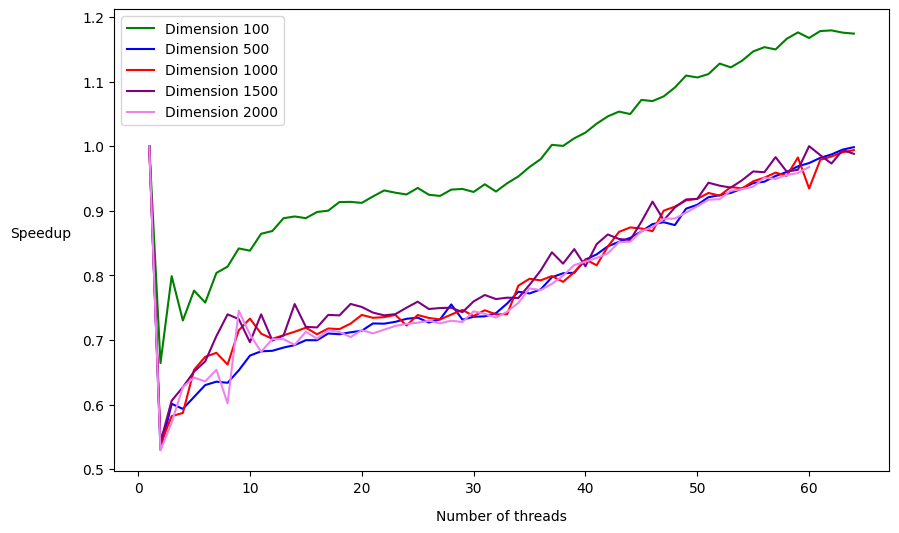

In [ ]:
plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["speedup"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Speedup", labelpad=30, rotation=0, fontsize=10)
plt.legend()
plt.show()